# Analysis of results

Packages

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

BASE_DIR = Path(os.path.abspath('')).parent
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: /home/jespeols/coding/GitHub_local/ARFusion


## Unimodal Phenotype Model

In [2]:
run_name = ''
results_dir = os.path.join(BASE_DIR, 'results', 'pheno', run_name)
ab_stats = pd.read_csv(os.path.join(results_dir, 'ab_stats.csv'))
iso_stats = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/jespeols/coding/GitHub_local/ARFusion/results/pheno/ab_stats.csv'

#### Antibiotic stats

In [ ]:
ab_stats

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
0,AMP,6964,3139,3825,4352,2612,5209,2868,2341,0.747990,0.612026,0.913667,0.896248,0.727357
1,CTX,7139,6452,687,6541,598,6926,6390,536,0.970164,0.780204,0.990391,0.896321,0.834241
2,GEN,7540,6985,555,7356,184,7047,6924,123,0.934615,0.221622,0.991267,0.668478,0.332882
3,TOB,1926,1729,197,1768,158,1833,1702,131,0.951713,0.664975,0.984384,0.829114,0.738028
4,CIP,7888,6208,1680,6670,1218,7064,6027,1037,0.895538,0.617262,0.970844,0.851396,0.715666
5,CAZ,7206,6627,579,6642,564,7065,6564,501,0.980433,0.865285,0.990493,0.888298,0.876640
6,CRO,2601,2339,262,2369,232,2555,2331,224,0.982314,0.854962,0.996580,0.965517,0.906883
7,OFX,265,196,69,211,54,242,192,50,0.913208,0.724638,0.979592,0.925926,0.813008
8,AMK,2983,2950,33,2983,0,2950,2950,0,0.988937,0.000000,1.000000,NaN,NaN
9,AMX,1114,531,583,500,614,941,429,512,0.844704,0.878216,0.807910,0.833876,0.855472


**Fig 1**: Compare the accuracy of each antibiotic to the data imbalance

In [ ]:
ab_stats.sort_values(by='accuracy', ascending=False)

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
16,NET,4,4,0,4,0,4,4,0,1.000000,NaN,1.000000,NaN,NaN
8,AMK,2983,2950,33,2983,0,2950,2950,0,0.988937,0.000000,1.000000,NaN,NaN
15,NOR,207,158,49,159,48,204,157,47,0.985507,0.959184,0.993671,0.979167,0.969072
6,CRO,2601,2339,262,2369,232,2555,2331,224,0.982314,0.854962,0.996580,0.965517,0.906883
5,CAZ,7206,6627,579,6642,564,7065,6564,501,0.980433,0.865285,0.990493,0.888298,0.876640
13,FEP,1469,1354,115,1356,113,1439,1340,99,0.979578,0.860870,0.989660,0.876106,0.868421
1,CTX,7139,6452,687,6541,598,6926,6390,536,0.970164,0.780204,0.990391,0.896321,0.834241
10,LVX,3054,2354,700,2404,650,2928,2316,612,0.958743,0.874286,0.983857,0.941538,0.906667
3,TOB,1926,1729,197,1768,158,1833,1702,131,0.951713,0.664975,0.984384,0.829114,0.738028
2,GEN,7540,6985,555,7356,184,7047,6924,123,0.934615,0.221622,0.991267,0.668478,0.332882


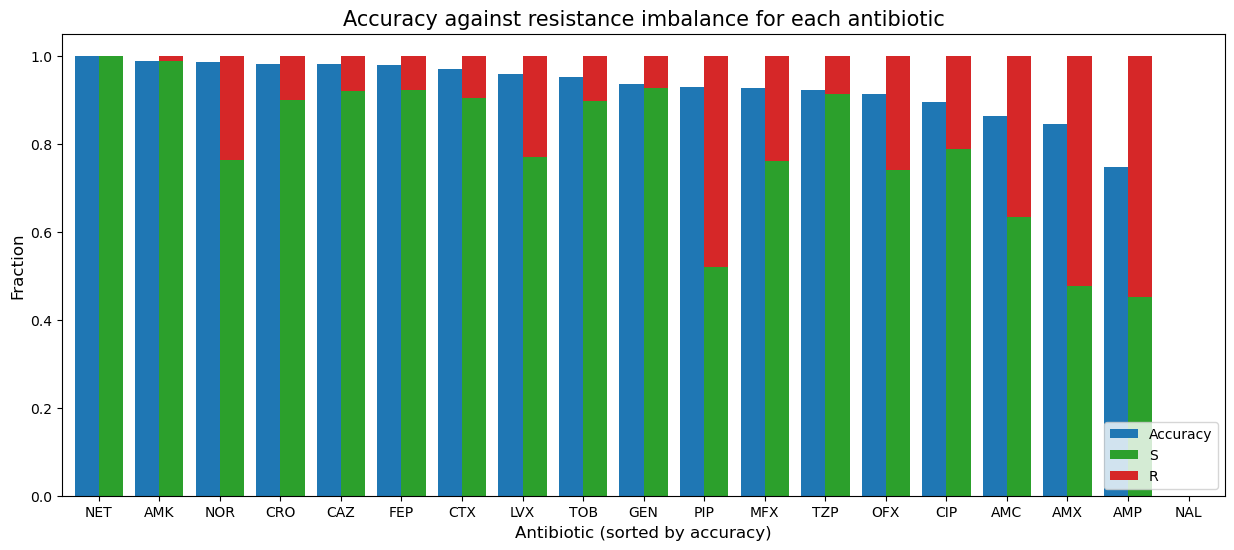

In [ ]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats.set_index('antibiotic', inplace=True)

fig, ax = plt.subplots(figsize=(15, 6))
bar1 = sorted_ab_stats['accuracy'].plot.bar(rot=0, width=-0.4, align='edge', color='tab:blue', ax=ax)
bar2 = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
ax.set_title('Accuracy against resistance imbalance for each antibiotic', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.legend(labels=['Accuracy', 'S', 'R'], loc='lower right')   
plt.show()

**Fig 2**: Comparing distributions of predictions to true distributions

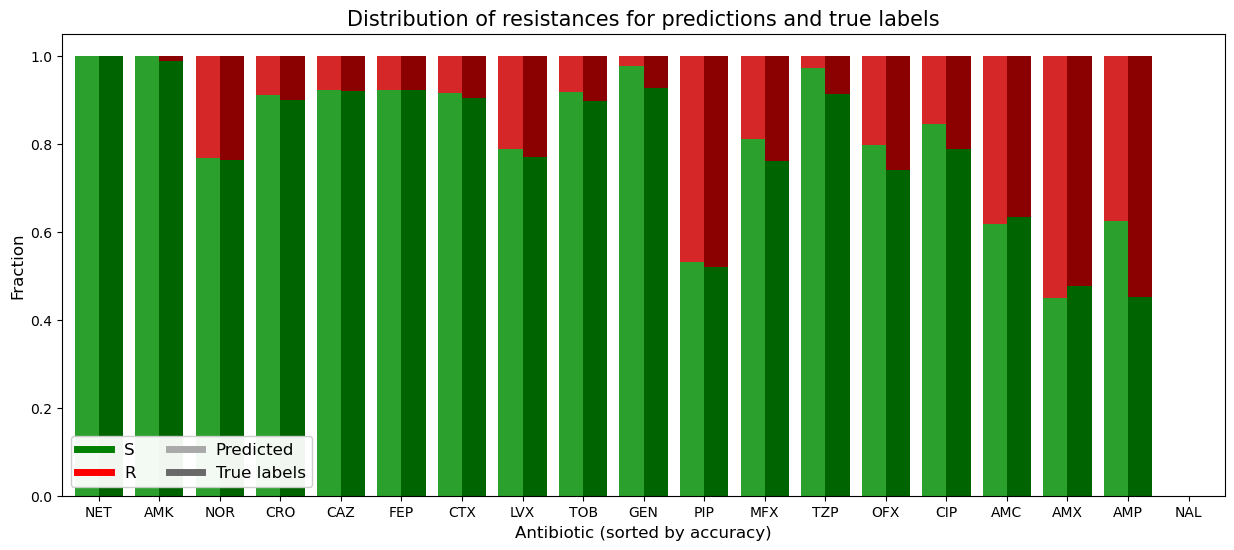

In [ ]:
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
bar_pred = sorted_ab_stats[['S_frac_pred', 'R_frac_pred']].plot.bar(
    rot=0, stacked=True, width=-0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
bar_true = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['darkgreen', 'darkred'], ax=ax
)
ax.set_title('Distribution of resistances for predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)

from matplotlib.lines import Line2D

S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
ax.legend([S_line, R_line, pred_line, true_line], 
          ['S', 'R', 'Predicted', 'True labels'], 
          loc='lower left', ncol=2, fontsize=12, framealpha=0.95
)
plt.show()

**Fig 3**: Combining Fig 1 and Fig 2 into one plot

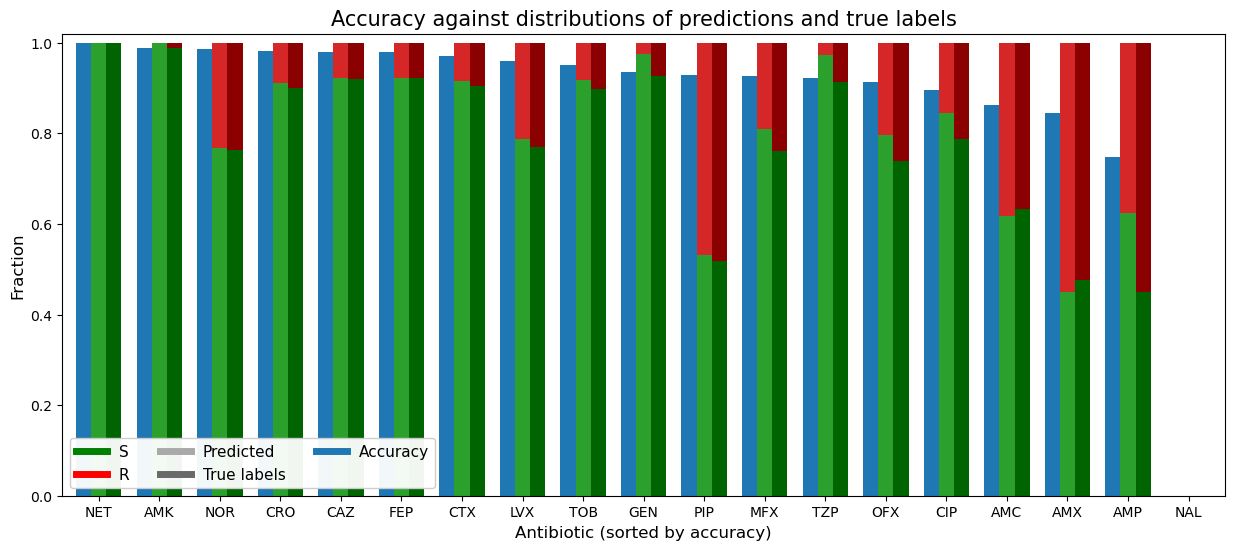

In [ ]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats.set_index('antibiotic', inplace=True)

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

#### Isolate stats

In [ ]:
iso_stats.head(n=20)

,year,country,gender,age,num_ab,num_R,num_S,num_masked,num_masked_S,num_masked_R,correct_S,correct_R,correct_all,specificity,sensitivity,accuracy
0,2006,AT,F,57.0,5,1,4,1,1,0,1,0,True,1.0,NaN,1.0
1,2020,AT,M,88.0,5,2,3,4,2,2,2,2,True,1.0,1.0,1.0
2,2010,BE,F,58.0,1,0,1,1,1,0,1,0,True,1.0,NaN,1.0
3,2018,CZ,M,67.0,5,1,4,3,3,0,3,0,True,1.0,NaN,1.0
4,2019,DE,F,50.0,12,4,8,3,3,0,3,0,True,1.0,NaN,1.0
5,2012,BE,F,74.0,6,0,6,3,3,0,3,0,True,1.0,NaN,1.0
6,2011,BE,M,84.0,8,3,5,1,0,1,0,1,True,NaN,1.0,1.0
7,2020,AT,F,48.0,9,0,9,1,1,0,1,0,True,1.0,NaN,1.0
8,2002,CZ,M,72.0,6,0,6,1,1,0,1,0,True,1.0,NaN,1.0
9,2017,AT,F,52.0,12,1,11,1,0,1,0,0,False,NaN,0.0,0.0


In [ ]:
df_stats = iso_stats.copy()

**Fig 1**: Compare correctly classified isolates for different sequence lengths

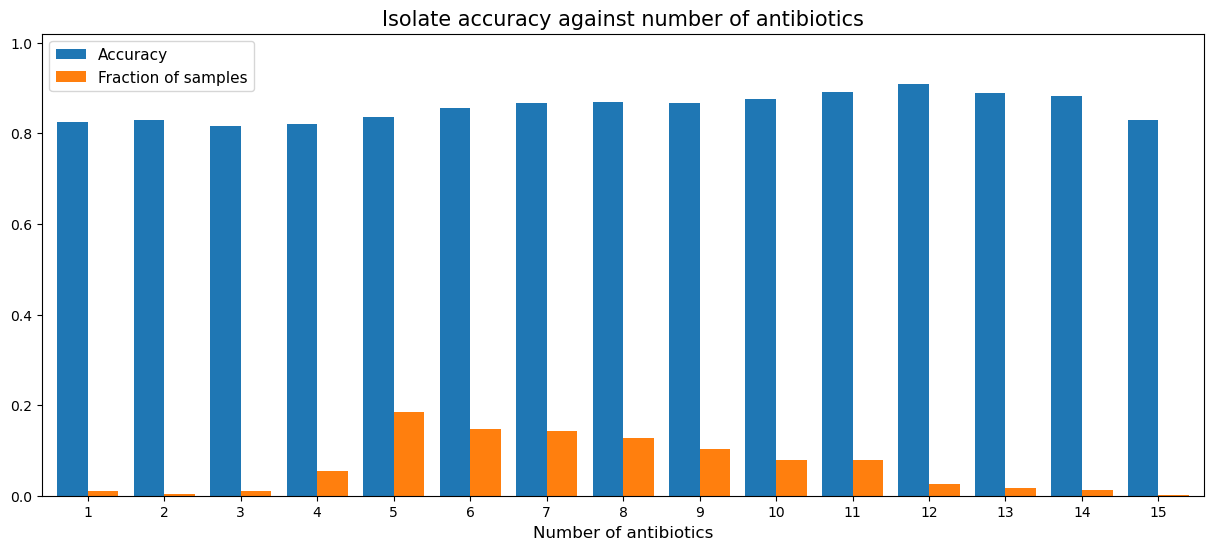

In [ ]:
df_tmp = df_stats.groupby('num_ab').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of antibiotics', fontsize=15)
ax.set_xlabel('Number of antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper left', fontsize=11)
plt.show()

**Fig 2**: Compare correctly classified isolates for different number of masked tests

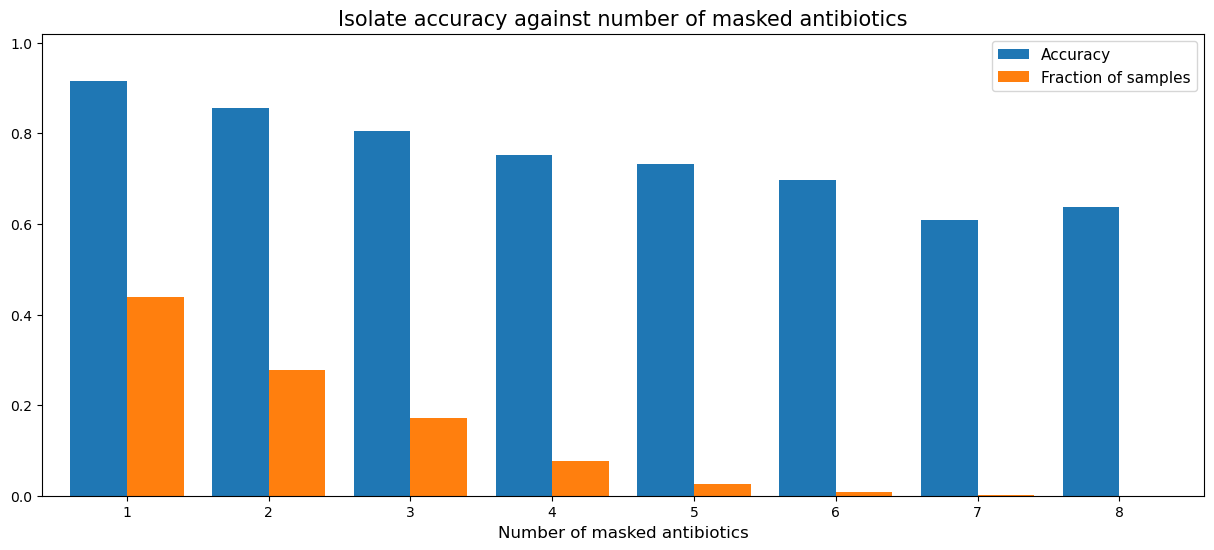

In [ ]:
df_tmp = df_stats.groupby('num_masked').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['accuracy'] > 0]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of masked antibiotics', fontsize=15)
ax.set_xlabel('Number of masked antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

**Fig 3**: Compare isolate accuracy against fraction of antibiotics that are resistant

       accuracy  count     share
num_R                           
0      0.980231  13607  0.453567
1      0.731348   6514  0.217133
2      0.792793   3663  0.122100
3      0.795445   2283  0.076100
4      0.743222   1254  0.041800
5      0.743863    937  0.031233
6      0.778675    619  0.020633
7      0.794872    429  0.014300
8      0.756198    242  0.008067
9      0.714286    147  0.004900
10     0.811429    175  0.005833
11     0.767123     73  0.002433
12     0.847826     46  0.001533
13     0.888889      9  0.000300
14     0.500000      2  0.000067


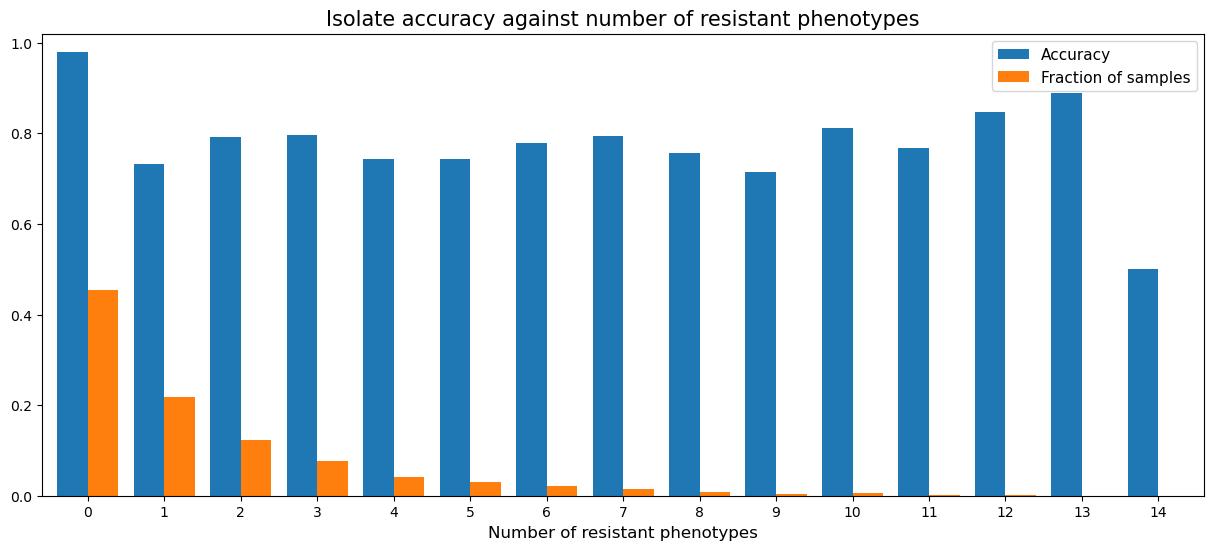

In [ ]:
df_tmp = df_stats.groupby('num_R').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['accuracy'] > 0]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
print(df_tmp)
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of resistant phenotypes', fontsize=15)
ax.set_xlabel('Number of resistant phenotypes', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_31396\3596830834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_31396\3596830834.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


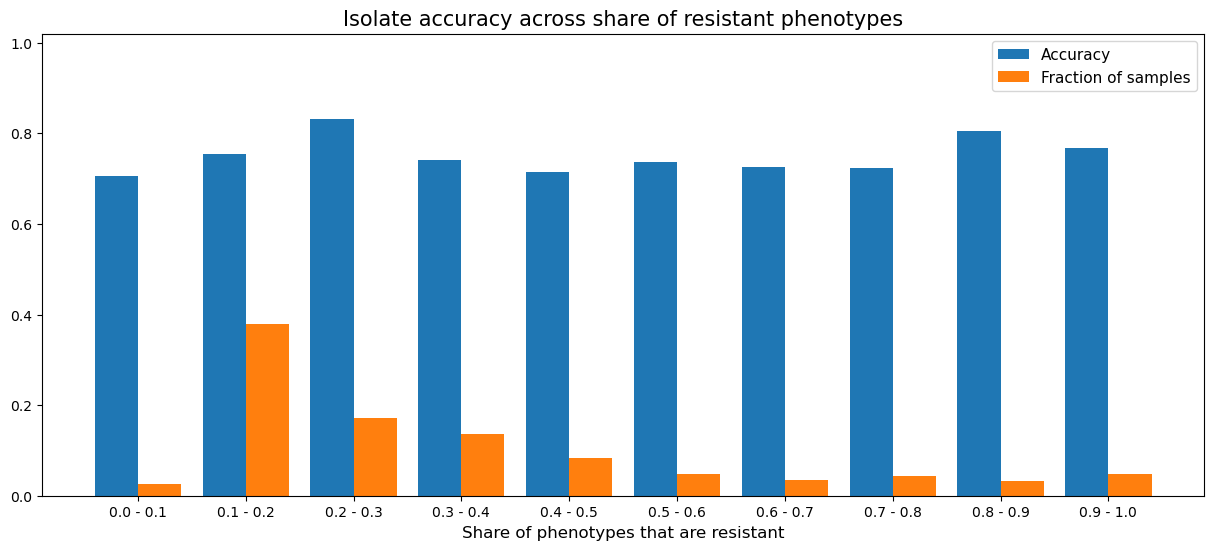

In [ ]:
df_tmp = df_stats.copy()
df_tmp['frac_R'] = df_tmp['num_R'] / df_tmp['num_ab']
bins = np.linspace(0, 1, 11)
df_tmp['frac_R_bin'] = pd.cut(df_tmp['frac_R'], bins=bins)
df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.head(n=20)
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')

ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy across share of resistant phenotypes', fontsize=15)
ax.set_xlabel('Share of phenotypes that are resistant', fontsize=12)
ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

**Fig 4**: Isolate accuracy across countries

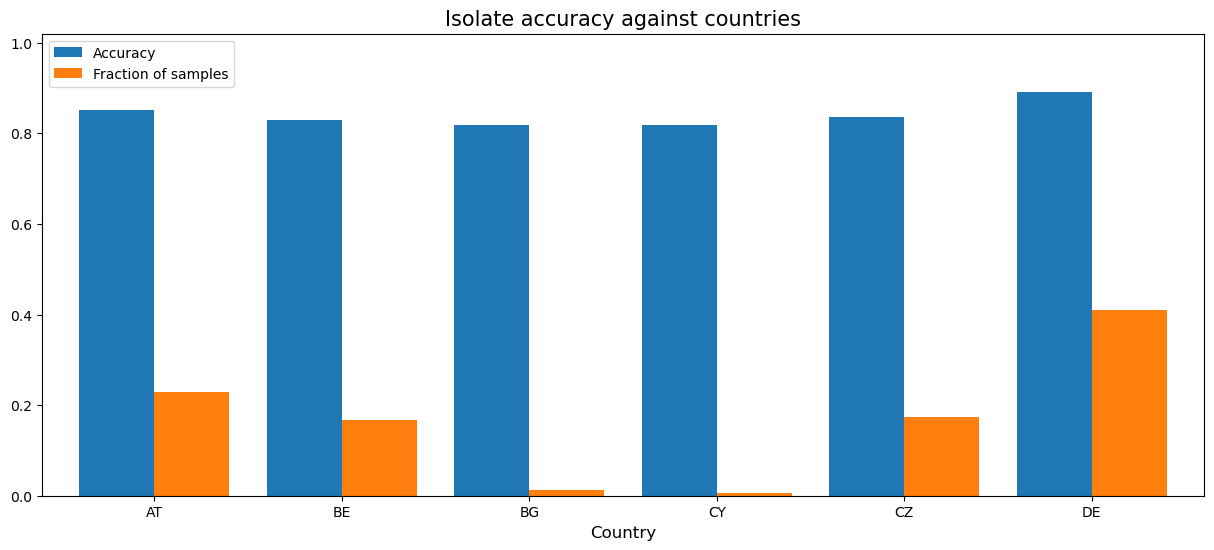

In [ ]:
df_tmp = df_stats.groupby('country').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against countries', fontsize=15)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper left', fontsize=10)
plt.show()

## Unimodal Genotype Model

In [2]:
run_name = 'test_run'
results_dir = os.path.join(BASE_DIR, 'results', 'geno', run_name)
iso_stats = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

In [5]:
iso_stats.head(n=50)

,year,country,genotypes,num_genotypes,num_point_mutations,num_masked,num_correct,correct_all
0,2018,Thailand,"['sul3', 'blaTEM-1', 'tet(A)', 'catA2', 'aph(6...",9,0,3,1,False
1,2005,USA,"['glpT_E448K=POINT', 'pmrB_Y358N=POINT']",2,2,1,1,True
2,[PAD],Tanzania,"['dfrA14', 'aph(6)-Id', 'sul2', 'blaTEM-1', 't...",6,0,2,2,True
3,[PAD],United Kingdom,"['catB3=PARTIAL_END_OF_CONTIG', 'mph(A)', 'tet...",13,3,3,3,True
4,2020,USA,"['mph(A)', 'parC_S80I=POINT', 'aadA5', 'blaCTX...",14,9,1,1,True
5,2017,Canada,"['catB3=PARTIAL_END_OF_CONTIG', 'mph(A)', 'par...",22,9,2,2,True
6,1999,USA,['glpT_E448K=POINT'],1,1,1,1,True
7,[PAD],[PAD],"['gyrA_D87G=POINT', 'mph(A)', 'parC_S80I=POINT...",16,4,4,4,True
8,2012,Netherlands,"['mcr-1.1', 'dfrA1', 'sul2', 'blaTEM-1', 'gyrA...",6,1,1,1,True
9,1997,France,['glpT_E448K=POINT'],1,1,1,0,False
